In [3]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pandas as pd

from pmdarima.arima.utils import ndiffs
from pmdarima import auto_arima

import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error
from math import sqrt

import numpy as np

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

In [4]:
itil_dec = [200.23, 146.28, 173.45, 222.3, 200.07, 151.88, 108.44, 123.52, 82.32, 65.64, 54.76, 15.13, 12.12]

In [5]:
df = pd.DataFrame()
df['value'] = itil_dec

result = adfuller(itil_dec)
print(result)

(0.007957025307257217, 0.9591852004797701, 1, 11, {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}, 72.5786290540407)


In [6]:
# tak pakai
y = df.value

# ADF TEST
print(ndiffs(y, test="adf"))

# KPSS TEST
print(ndiffs(y, test="kpss"))

# PP TEST
print(ndiffs(y, test="pp"))

0
1
2


In [7]:
df.head(36)

,value
0,200.23
1,146.28
2,173.45
3,222.30
4,200.07
5,151.88
6,108.44
7,123.52
8,82.32
9,65.64


In [8]:
print('ADF Statistic: %f' % result[0])

# p value > 0.05, therefore time series is not stationary
print('p-value: %f' % result[1])

ADF Statistic: 0.007957
p-value: 0.959185


In [9]:
stepwise_fit = auto_arima(df.value, trace=True, supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=120.634, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=122.630, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=122.589, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=121.334, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.433 seconds


In [10]:
train = df.iloc[:-6]
test = df.iloc[-7:]

In [11]:
train

,value
0,200.23
1,146.28
2,173.45
3,222.30
4,200.07
5,151.88
6,108.44


In [12]:
test

,value
6,108.44
7,123.52
8,82.32
9,65.64
10,54.76
11,15.13
12,12.12


In [20]:
model = ARIMA(train, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                    6
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -30.563
Method:                           css   S.D. of innovations             39.443
Date:                Fri, 10 Dec 2021   AIC                             65.125
Time:                        16:33:57   BIC                             64.709
Sample:                             1   HQIC                            63.458
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.2983     16.102     -0.950      0.342     -46.859      16.262


C:\Users\amin1858\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


7     93.141667
8     77.843333
9     62.545000
10    47.246667
11    31.948333
12    16.650000
13     1.351667
Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

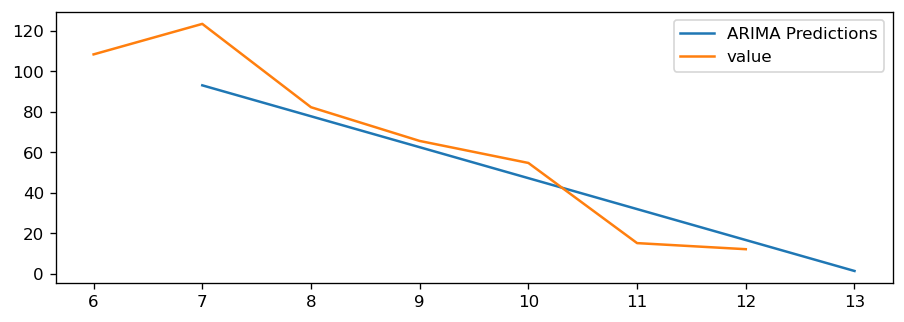

In [21]:
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')
print(pred)
pred.plot(legend=True)
test['value'].plot(legend=True)

In [22]:
# accuracy metric
test_mean = test.value.mean()
print(test_mean)
rmse = sqrt(mean_squared_error(pred, test['value']))
print(rmse)
accuracy = rmse/test_mean * 100
print('Average Error: ' + str(accuracy) + '%')

65.99
22.954619066931528
Average Error: 34.78499631297398%
